# Verifaction of Results
In order to evaluate the validity and accuracy of the program's results, several test cases were compared against the ISO 9613-2 implementation conducted by {cite:t}`dbmap`. The software was tested using identical test cases created on both [dBmap.net](dBmap.net) and in a Jupyter Notebook, demonstrating the level of attenuation in various environments. This comparison allowed for an assessment of the program's performance and its adherence to the ISO standard.

In [8]:
import os
from pathlib import Path
import sys
sys.path.append(str(Path(os.getcwd()).parent.parent))
from src.utils import ElevationHandler, ElevationHandlerTest, import_point_source_data, calc_extent, solve_noise_map
import numpy as np
import matplotlib.pyplot as plt
from cartopy.io.img_tiles import GoogleTiles
import cartopy.crs as ccrs
from scipy.interpolate import RectBivariateSpline, griddata
import pandas as pd

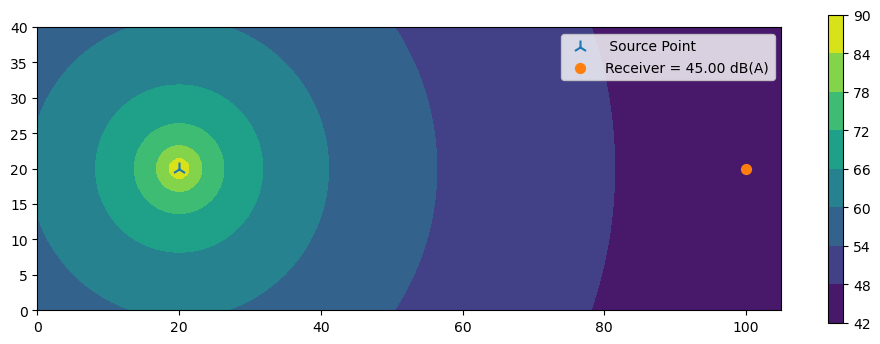

In [28]:
point_source_data = pd.DataFrame(data=[
    {"latitude": 20,
        "longitude": 20,
        "h": 1,
        "octave_band": {"1000": 100}}])

map_shape = [40, 150]
map_boundaries = [0, 105, 0, 40]
map_array = np.zeros(map_shape)
# map_array[:,25] = 100
elevation_handler = ElevationHandlerTest(map_array, map_boundaries)
LDW = solve_noise_map(elevation_handler, point_source_data, ground_factor=1)

receiver = [100, 20]

interp_spline = RectBivariateSpline(elevation_handler.lat_range, elevation_handler.long_range, LDW)
receiver_value = interp_spline(receiver[1], receiver[0]).max()

# receiver_value = LDW[receiver[1], receiver[0]]
fig, ax = plt.subplots(figsize = (12,4))
cl = ax.contourf(elevation_handler.long_range, elevation_handler.lat_range, LDW)
plt.colorbar(cl, ax = ax)
ax.set(aspect="equal")
ax.scatter(point_source_data.longitude, point_source_data.latitude, marker = "2", s = 100, label = " Source Point")
ax.scatter(*receiver, marker = "o", s = 50, label = f"Receiver = {receiver_value:.2f} dB(A)")
plt.tight_layout
plt.legend()
plt.show()
# https://dbmap.net/267yt